In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 75s 2s/step - loss: 0.7712 - accuracy: 0.4842 - val_loss: 0.6921 - val_accuracy: 0.5605
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
31/31 [==============================] - 53s 2s/step - loss: 0.6889 - accuracy: 0.5756 - val_loss: 0.7325 - val_accuracy: 0.5161
Epoch 3/20
31/31 [==============================] - 57s 2s/step - loss: 0.6536 - accuracy: 0.6106 - val_loss: 0.5471 - val_accuracy: 0.6734
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/20
31/31 [==============================] - 50s 2s/step - loss: 0.4549 - accuracy: 0.7762 - val_loss: 0.3559 - val_accuracy: 0.8347
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/20
31/31 [==============================] - 44s 1s/step - loss: 0.3688 - accuracy: 0.8373 - val_loss: 0.2521 - val_accuracy: 0.9073
INFO:tensorflow:Assets written to: model-005.model\assets
Epoch 6/20
31/31 [==============================] - 43s 1s/step - lo

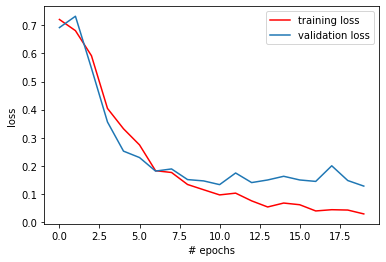

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

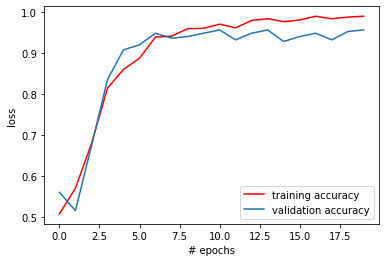

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 2s 321ms/step - loss: 0.2242 - accuracy: 0.9420
[0.2242007702589035, 0.9420289993286133]
